# Homogeneous Coordinate

## 3D plotting

In [2]:
from mpl_toolkits import mplot3d

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from math import cos, sin
from math import sqrt

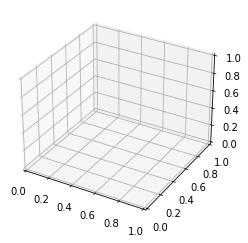

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')

### Three-dimensional Points and Lines

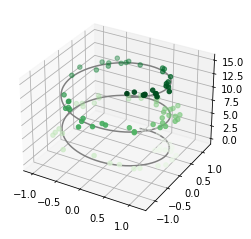

In [11]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for 3D scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

### function for rotation and translation

In [88]:
def homogeneous(rot_x, rot_y, rot_z, trans_x, trans_y, trans_z, p_n):
    R_x = np.array([[1, 0, 0, 0],
                    [0, cos(rot_x), -sin(rot_x), 0],
                    [0, sin(rot_x), cos(rot_x), 0],
                    [0, 0, 0, 1]])
    R_y = np.array([[cos(rot_y), 0, sin(rot_y), 0],
                    [0, 1, 0, 0],
                    [-sin(rot_y), 0, cos(rot_y), 0],
                    [0, 0, 0, 1]])
    R_z = np.array([[cos(rot_z), -sin(rot_z), 0, 0],
                    [sin(rot_z), cos(rot_z), 0, 0],
                    [0, 0, 1, 0],
                    [0, 0, 0, 1]])
    T = np.array([[1,0,0,trans_x],
                   [0,1,0,trans_y],
                   [0,0,1,trans_z],
                   [0,0,0,1]])
    
    T_t = R_x @ R_y @ R_z @ T
    return T_t@p_n
    

In [90]:
# Test homogeneous matrix
p0 = np.array([0, 0, 0, 1]).reshape(-1,1)
print("Origin", p0.T)
rot_x, rot_y, rot_z, trans_x, trans_y, trans_z = 0,0,0,2,0,0
print("rot_x:{}, rot_y:{}, rot_z:{}, trans_x:{}, trans_y:{}, trans_z:{}".format(rot_x, rot_y, rot_z, trans_x, trans_y, trans_z))



print(homogeneous(rot_x, rot_y, rot_z, trans_x, trans_y, trans_z, p0).T)

Origin [[0 0 0 1]]
rot_x:0, rot_y:0, rot_z:0, trans_x:2, trans_y:0, trans_z:0
[[2. 0. 0. 1.]]


[0 0 0 1]


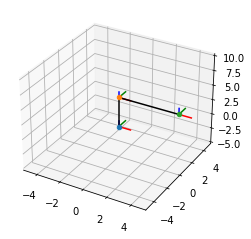

In [141]:
# print in 3D
fig = plt.figure()
ax = plt.axes(projection='3d')

p0_v = np.array([1,1,1,1]).flatten()
p0 = p0.flatten()
print(p0)

rot_x, rot_y, rot_z, trans_x, trans_y, trans_z = 0,0,0,0,0,5

p1 = homogeneous(rot_x, rot_y, rot_z, trans_x, trans_y, trans_z, p0)
p1_v = homogeneous(rot_x, rot_y, rot_z, trans_x, trans_y, trans_z, p0_v)

rot_x, rot_y, rot_z, trans_x, trans_y, trans_z = 0,0,0,5,0,0

p2 = homogeneous(rot_x, rot_y, rot_z, trans_x, trans_y, trans_z, p1)
p2_v = homogeneous(rot_x, rot_y, rot_z, trans_x, trans_y, trans_z, p1_v)

ax.set_xlim(-5, 5); ax.set_ylim(-5, 5); ax.set_zlim(-5, 10);

ax.scatter3D(p0[0], p0[1], p0[2])
ax.plot3D([p0[0], p0_v[0]], [p0[1], p0[1]], [p0[2], p0[2]], 'r')
ax.plot3D([p0[0], p0[0]], [p0[1], p0_v[1]], [p0[2], p0[2]], 'g')
ax.plot3D([p0[0], p0[0]], [p0[1], p0[1]], [p0[2], p0_v[2]], 'b')

ax.plot3D([p0[0], p1[0]], [p0[1], p1[1]], [p0[2], p1[2]], 'k')

ax.scatter3D(p1[0], p1[1], p1[2])
ax.plot3D([p1[0], p1_v[0]], [p1[1], p1[1]], [p1[2], p1[2]], 'r')
ax.plot3D([p1[0], p1[0]], [p1[1], p1_v[1]], [p1[2], p1[2]], 'g')
ax.plot3D([p1[0], p1[0]], [p1[1], p1[1]], [p1[2], p1_v[2]], 'b')

ax.plot3D([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], 'k')

ax.scatter3D(p2[0], p2[1], p2[2])
ax.plot3D([p2[0], p2_v[0]], [p2[1], p2[1]], [p2[2], p2[2]], 'r')
ax.plot3D([p2[0], p2[0]], [p2[1], p2_v[1]], [p2[2], p2[2]], 'g')
ax.plot3D([p2[0], p2[0]], [p2[1], p2[1]], [p2[2], p2_v[2]], 'b')